## Correlation between the RV of current 10 mins and the target, and trade data. 

In [20]:
import pandas as pd

In [21]:
import numpy as np

In [22]:
import sys
sys.path.append("../")
import importlib

from proj_mod import data_processing, training
importlib.reload(data_processing);
importlib.reload(training);

In [23]:
path_book="../raw_data/kaggle_ORVP/book_train.parquet"

In [24]:
df_train=pd.read_csv("../raw_data/kaggle_ORVP/train.csv")

In [25]:
df_train

,stock_id,time_id,target
0,0,5,0.004136
1,0,11,0.001445
2,0,16,0.002168
3,0,31,0.002195
4,0,62,0.001747
...,...,...,...
428927,126,32751,0.003461
428928,126,32753,0.003113
428929,126,32758,0.004070
428930,126,32763,0.003357


In [26]:
len_train=len(df_train)

In [27]:
df_train["row_id"]=df_train["stock_id"].astype(str)+"-"+df_train["time_id"].astype(str)

In [28]:
df_train

,stock_id,time_id,target,row_id
0,0,5,0.004136,0-5
1,0,11,0.001445,0-11
2,0,16,0.002168,0-16
3,0,31,0.002195,0-31
4,0,62,0.001747,0-62
...,...,...,...,...
428927,126,32751,0.003461,126-32751
428928,126,32753,0.003113,126-32753
428929,126,32758,0.004070,126-32758
428930,126,32763,0.003357,126-32763


# Load in the precalculated RV values (see data_processing_functions.ipynb)

In [29]:
df_RV=pd.read_csv("../processed_data/RV_by_row_id.csv")

In [30]:
df_RV

,row_id,RV
0,0-5,0.004499
1,0-11,0.001204
2,0-16,0.002369
3,0-31,0.002574
4,0-62,0.001894
...,...,...
428927,99-32751,0.001436
428928,99-32753,0.001795
428929,99-32758,0.001658
428930,99-32763,0.002213


## Load in precalculated trade data (see data_processing_functions.ipynb)

In [31]:
df_trade_vals=pd.read_csv("../processed_data/trade_vals_by_row_id.csv")

In [32]:
df_trade_vals

,price_mean,price_std,size_sum,size_mean,size_std,order_count_sum,order_count_mean,order_count_std,row_id
0,1.003722,0.000578,3179,79.475000,118.375107,110,2.750000,2.467741,0-5
1,1.000206,0.000304,1289,42.966667,77.815203,57,1.900000,1.446756,0-11
2,0.999204,0.000932,2161,86.440000,113.587000,68,2.720000,2.300725,0-16
3,0.999020,0.000729,1962,130.800000,144.828569,59,3.933333,4.043808,0-31
4,0.999618,0.000182,1791,81.409091,117.914682,89,4.045455,4.099678,0-62
...,...,...,...,...,...,...,...,...,...
428908,1.000635,0.000431,48894,474.699029,534.042552,494,4.796117,4.598293,99-32751
428909,1.000694,0.000664,48635,528.641304,717.778741,585,6.358696,6.732864,99-32753
428910,0.998246,0.000552,50438,600.452381,1177.948006,457,5.440476,7.490317,99-32758
428911,0.998905,0.000309,47020,283.253012,372.698606,588,3.542169,3.248501,99-32763


## Create the extended dataframe with RV. One can also include the trade data now. 

In [33]:
df_extended=pd.merge(df_train,df_RV,on="row_id")

In [34]:
df_extended

,stock_id,time_id,target,row_id,RV
0,0,5,0.004136,0-5,0.004499
1,0,11,0.001445,0-11,0.001204
2,0,16,0.002168,0-16,0.002369
3,0,31,0.002195,0-31,0.002574
4,0,62,0.001747,0-62,0.001894
...,...,...,...,...,...
428927,126,32751,0.003461,126-32751,0.003691
428928,126,32753,0.003113,126-32753,0.004104
428929,126,32758,0.004070,126-32758,0.003118
428930,126,32763,0.003357,126-32763,0.003661


In [35]:
df_extended=pd.merge(df_extended,df_trade_vals,on="row_id")

In [36]:
df_extended

,stock_id,time_id,target,row_id,RV,price_mean,price_std,size_sum,size_mean,size_std,order_count_sum,order_count_mean,order_count_std
0,0,5,0.004136,0-5,0.004499,1.003722,0.000578,3179,79.475000,118.375107,110,2.750000,2.467741
1,0,11,0.001445,0-11,0.001204,1.000206,0.000304,1289,42.966667,77.815203,57,1.900000,1.446756
2,0,16,0.002168,0-16,0.002369,0.999204,0.000932,2161,86.440000,113.587000,68,2.720000,2.300725
3,0,31,0.002195,0-31,0.002574,0.999020,0.000729,1962,130.800000,144.828569,59,3.933333,4.043808
4,0,62,0.001747,0-62,0.001894,0.999618,0.000182,1791,81.409091,117.914682,89,4.045455,4.099678
...,...,...,...,...,...,...,...,...,...,...,...,...,...
428908,126,32751,0.003461,126-32751,0.003691,0.999289,0.000461,2570,69.459459,102.734446,103,2.783784,2.819921
428909,126,32753,0.003113,126-32753,0.004104,1.002344,0.001231,2323,54.023256,71.029668,147,3.418605,3.587230
428910,126,32758,0.004070,126-32758,0.003118,1.000673,0.000409,3740,106.857143,115.182245,98,2.800000,1.937251
428911,126,32763,0.003357,126-32763,0.003661,1.001855,0.000387,9389,117.362500,140.992346,234,2.925000,2.348040


## Observe the native correlation between target and RV.

In [15]:
df_extended[["target","RV"]].corr()

,target,RV
target,1.000000,0.873777
RV,0.873777,1.000000


In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model=LinearRegression()
model.fit(df_extended[["RV"]],df_extended[["target"]])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
native_linear=model.predict(df_extended[["RV"]])

In [35]:
training.rmspe(y_pred=native_linear,y_true=df_extended[["target"]])

target    0.354349
dtype: float64

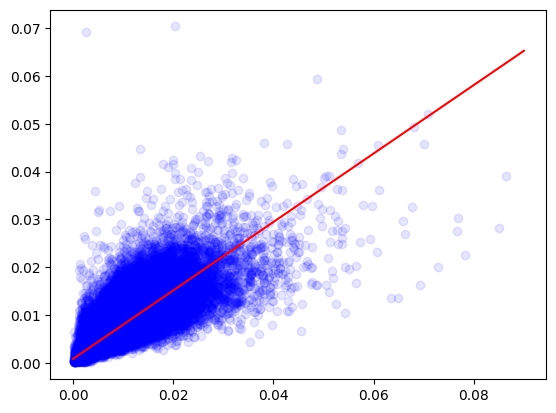

In [45]:
import matplotlib.pyplot as plt

x=np.linspace(0,0.09)
y=x*model.coef_[0][0]+model.intercept_[0]

plt.plot(x,y,color="red")
plt.scatter(df_extended[["RV"]],df_extended[["target"]],color="blue",alpha=0.1)

plt.show()

Evidently, there is significant correlation between the target and the current RV. But the spread is not very indicative. TBH, we can use the linear model by RV as our trivial base model. 

## Observe the correlation when limited to stock 0.

In [17]:
df_extended[df_extended["stock_id"]==0][["target","RV"]].corr()

,target,RV
target,1.000000,0.840606
RV,0.840606,1.000000


In [46]:
model=LinearRegression()
model.fit(df_extended[df_extended["stock_id"]==0][["RV"]],df_extended[df_extended["stock_id"]==0][["target"]])
stock_0_linear=model.predict(df_extended[df_extended["stock_id"]==0][["RV"]])
training.rmspe(y_pred=stock_0_linear,y_true=df_extended[df_extended["stock_id"]==0][["target"]])

target    0.359974
dtype: float64

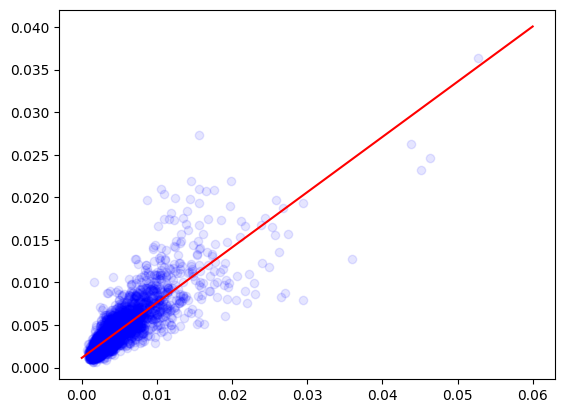

In [ ]:
import matplotlib.pyplot as plt

x=np.linspace(0,0.06)
y=x*model.coef_[0][0]+model.intercept_[0]

plt.plot(x,y,color="red")
plt.scatter(df_extended[df_extended["stock_id"]==0][["RV"]],df_extended[df_extended["stock_id"]==0][["target"]],color="blue",alpha=0.1)

plt.show()

Although the correlation reduced, the spread seems "tighter". The loss is ever so slightly worse tho. 

## Observe the correlation when limited to time 5. 

In [19]:
df_extended[df_extended["time_id"]==5][["target","RV"]].corr()

,target,RV
target,1.000000,0.918001
RV,0.918001,1.000000


In [48]:
model=LinearRegression()
model.fit(df_extended[df_extended["time_id"]==5][["RV"]],df_extended[df_extended["time_id"]==5][["target"]])
stock_0_linear=model.predict(df_extended[df_extended["time_id"]==5][["RV"]])
training.rmspe(y_pred=stock_0_linear,y_true=df_extended[df_extended["time_id"]==5][["target"]])

target    0.165694
dtype: float64

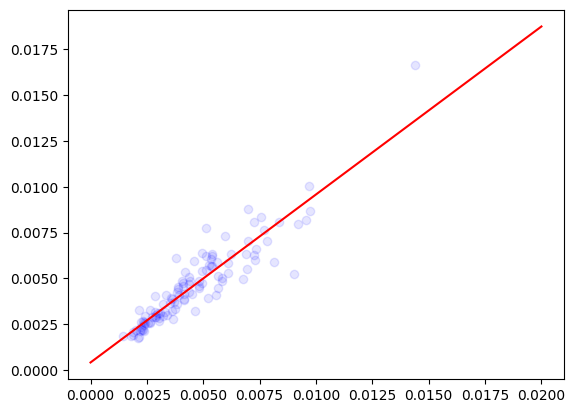

In [49]:
import matplotlib.pyplot as plt

x=np.linspace(0,0.02)
y=x*model.coef_[0][0]+model.intercept_[0]

plt.plot(x,y,color="red")
plt.scatter(df_extended[df_extended["time_id"]==5][["RV"]],df_extended[df_extended["time_id"]==5][["target"]],color="blue",alpha=0.1)

plt.show()

This is much more significant. The loss reduced greatly as well. 

## We also want to see this across all of the stock id and time ids, not just one of them. 

## First, group by stock id. 

In [20]:
df_corr_by_stock=df_extended.groupby("stock_id")[["target","RV"]].corr()

In [21]:
df_corr_by_stock

target        RV
stock_id                           
0        target  1.000000  0.840606
         RV      0.840606  1.000000
1        target  1.000000  0.847510
         RV      0.847510  1.000000
2        target  1.000000  0.881656
...                   ...       ...
124      RV      0.882409  1.000000
125      target  1.000000  0.877262
         RV      0.877262  1.000000
126      target  1.000000  0.834651
         RV      0.834651  1.000000

[224 rows x 2 columns]

In [22]:
avg_corr_by_stock=(df_corr_by_stock["RV"].apply(abs).sum()-len(df_corr_by_stock)/2)/(len(df_corr_by_stock)/2)

In [23]:
avg_corr_by_stock

np.float64(0.8570502134452056)

The average of all correlation grouped by stock id is slightly higher than that of native. 

In [67]:
df_rmspe_linear_stock=df_extended.groupby("stock_id")[["target","RV"]].apply(training.rmspe_linear_df, list_feature=["RV"], str_target="target")

In [70]:
df_rmspe_linear_stock.mean()

target    0.30662
dtype: float64

"On average", the target is "closer to linear" when grouped by stock. 

## Now, group by time. 

In [24]:
df_corr_by_time=df_extended.groupby("time_id")[["target","RV"]].corr()

In [25]:
df_corr_by_time

target        RV
time_id                           
5       target  1.000000  0.918001
        RV      0.918001  1.000000
11      target  1.000000  0.822928
        RV      0.822928  1.000000
16      target  1.000000  0.804232
...                  ...       ...
32758   RV      0.733892  1.000000
32763   target  1.000000  0.595437
        RV      0.595437  1.000000
32767   target  1.000000  0.782757
        RV      0.782757  1.000000

[7660 rows x 2 columns]

In [26]:
avg_corr_by_time=(df_corr_by_time["RV"].apply(abs).sum()-len(df_corr_by_time)/2)/(len(df_corr_by_time)/2)

In [27]:
avg_corr_by_time

np.float64(0.8418139301097685)

The average correlation grouped by time is roughly the same as native. 

In [71]:
df_rmspe_linear_time=df_extended.groupby("time_id")[["target","RV"]].apply(training.rmspe_linear_df, list_feature=["RV"], str_target="target")

In [74]:
df_rmspe_linear_time.mean()

target    0.228626
dtype: float64

"On average", the target is "much closer to linear" when grouped by time. However, this is not all good new, we simply can not be training with the data at this very second to predict the future - we do not know the target with them as features. Can we somehow determine what time is "similar" to another time with some data? 